In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import matplotlib.pyplot as plt
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [3]:
hongdae = pd.read_csv('../data/홍대입구 일별 시간대별 승객유형별 승하차인원 (1).csv')

In [4]:
hongdae.승객유형.unique()

array(['일반', '어린이', '중고생', '청소년', '우대권', '영어 일반', '일어 일반', '중국어 일반',
       '영어 어린이', '중국어 어린이', '일어 어린이', '직원'], dtype=object)

In [5]:
hongdae['date']=pd.to_datetime(hongdae['수송일자'])

In [6]:
days=["월", "화", "수", "목", "금", "토", "일"]

hongdae['day']=hongdae['date'].dt.weekday.map(dict(enumerate(days)))

In [7]:
hongdae.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16406 entries, 0 to 16405
Data columns (total 30 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   수송일자      16406 non-null  object        
 1   호선명       16406 non-null  float64       
 2   역번호       16406 non-null  int64         
 3   역명        16406 non-null  object        
 4   승하차구분     16406 non-null  object        
 5   승객유형      16406 non-null  object        
 6   06시간대이전   16406 non-null  int64         
 7   06-07시간대  16406 non-null  int64         
 8   07-08시간대  16406 non-null  int64         
 9   08-09시간대  16406 non-null  int64         
 10  09-10시간대  16406 non-null  int64         
 11  10-11시간대  16406 non-null  int64         
 12  11-12시간대  16406 non-null  int64         
 13  12-13시간대  16406 non-null  int64         
 14  13-14시간대  16406 non-null  int64         
 15  14-15시간대  16406 non-null  int64         
 16  15-16시간대  16406 non-null  int64         
 17  16-17시간대  16

In [9]:
hongdae_under20=hongdae[(hongdae['승객유형']=='어린이')|(hongdae['승객유형']=='중고생')|(hongdae['승객유형']=='청소년')]
hongdae_under20.head()

,수송일자,호선명,역번호,역명,승하차구분,승객유형,06시간대이전,06-07시간대,07-08시간대,08-09시간대,...,19-20시간대,20-21시간대,21-22시간대,22-23시간대,23-24시간대,24시간대이후,월,년,date,day
1,2022-06-01,2.0,239,홍대입구,승차,어린이,1,0,2,3,...,53,30,18,6,0,0.0,6,2022,2022-06-01,수
2,2022-06-01,2.0,239,홍대입구,승차,중고생,0,1,0,0,...,2,1,2,1,1,0.0,6,2022,2022-06-01,수
3,2022-06-01,2.0,239,홍대입구,승차,청소년,43,30,21,20,...,661,660,595,455,120,0.0,6,2022,2022-06-01,수
11,2022-06-01,2.0,239,홍대입구,하차,어린이,0,2,1,5,...,6,7,9,1,0,0.0,6,2022,2022-06-01,수
12,2022-06-01,2.0,239,홍대입구,하차,중고생,0,1,0,1,...,1,0,0,3,3,0.0,6,2022,2022-06-01,수


In [11]:
hongdae_under20.drop(
    ['호선명','역번호','역명'],
    axis=1,
    inplace=True
)
hongdae_under20.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4386 entries, 1 to 16397
Data columns (total 27 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   수송일자      4386 non-null   object        
 1   승하차구분     4386 non-null   object        
 2   승객유형      4386 non-null   object        
 3   06시간대이전   4386 non-null   int64         
 4   06-07시간대  4386 non-null   int64         
 5   07-08시간대  4386 non-null   int64         
 6   08-09시간대  4386 non-null   int64         
 7   09-10시간대  4386 non-null   int64         
 8   10-11시간대  4386 non-null   int64         
 9   11-12시간대  4386 non-null   int64         
 10  12-13시간대  4386 non-null   int64         
 11  13-14시간대  4386 non-null   int64         
 12  14-15시간대  4386 non-null   int64         
 13  15-16시간대  4386 non-null   int64         
 14  16-17시간대  4386 non-null   int64         
 15  17-18시간대  4386 non-null   int64         
 16  18-19시간대  4386 non-null   int64         
 17  19-20시간대  4386 non

/var/folders/r4/77bfg6f94ylc4fbsrpn6kvc40000gn/T/ipykernel_2071/1195514196.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hongdae_under20.drop(


In [12]:
hongdae_under20.drop(
    ['수송일자'],
    axis=1,
    inplace=True
)
hongdae_under20.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4386 entries, 1 to 16397
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   승하차구분     4386 non-null   object        
 1   승객유형      4386 non-null   object        
 2   06시간대이전   4386 non-null   int64         
 3   06-07시간대  4386 non-null   int64         
 4   07-08시간대  4386 non-null   int64         
 5   08-09시간대  4386 non-null   int64         
 6   09-10시간대  4386 non-null   int64         
 7   10-11시간대  4386 non-null   int64         
 8   11-12시간대  4386 non-null   int64         
 9   12-13시간대  4386 non-null   int64         
 10  13-14시간대  4386 non-null   int64         
 11  14-15시간대  4386 non-null   int64         
 12  15-16시간대  4386 non-null   int64         
 13  16-17시간대  4386 non-null   int64         
 14  17-18시간대  4386 non-null   int64         
 15  18-19시간대  4386 non-null   int64         
 16  19-20시간대  4386 non-null   int64         
 17  20-21시간대  4386 non

/var/folders/r4/77bfg6f94ylc4fbsrpn6kvc40000gn/T/ipykernel_2071/3317474553.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hongdae_under20.drop(


In [14]:
# melt 함수 적용
hongdae_20time = pd.melt(
    hongdae_under20,
    # id_vars: 유지할 컬럼들
    id_vars=['년','월','date', 'day', '승하차구분', '승객유형'],
    # var_name: 시간대 컬럼명
    var_name='시간대',
    # value_name: 승객수 컬럼명
    value_name='승객수'
)
hongdae_20time.head()

,년,월,date,day,승하차구분,승객유형,시간대,승객수
0,2022,6,2022-06-01,수,승차,어린이,06시간대이전,1.0
1,2022,6,2022-06-01,수,승차,중고생,06시간대이전,0.0
2,2022,6,2022-06-01,수,승차,청소년,06시간대이전,43.0
3,2022,6,2022-06-01,수,하차,어린이,06시간대이전,0.0
4,2022,6,2022-06-01,수,하차,중고생,06시간대이전,0.0


In [15]:
def convert_time_to_int(time_slot):
    if '이전' in time_slot:
        return 5
    elif '이후' in time_slot:
        return 24
    else:
        # '-' 구분자로 시간을 분리하고 첫 번째 시간을 정수로 변환
        return int(time_slot.split('-')[0].replace('시간대', ''))

# 시간대 컬럼에 함수 적용
hongdae_20time['time'] = hongdae_20time['시간대'].map(convert_time_to_int)

In [16]:
hongdae_20time.head()

,년,월,date,day,승하차구분,승객유형,시간대,승객수,time
0,2022,6,2022-06-01,수,승차,어린이,06시간대이전,1.0,5
1,2022,6,2022-06-01,수,승차,중고생,06시간대이전,0.0,5
2,2022,6,2022-06-01,수,승차,청소년,06시간대이전,43.0,5
3,2022,6,2022-06-01,수,하차,어린이,06시간대이전,0.0,5
4,2022,6,2022-06-01,수,하차,중고생,06시간대이전,0.0,5


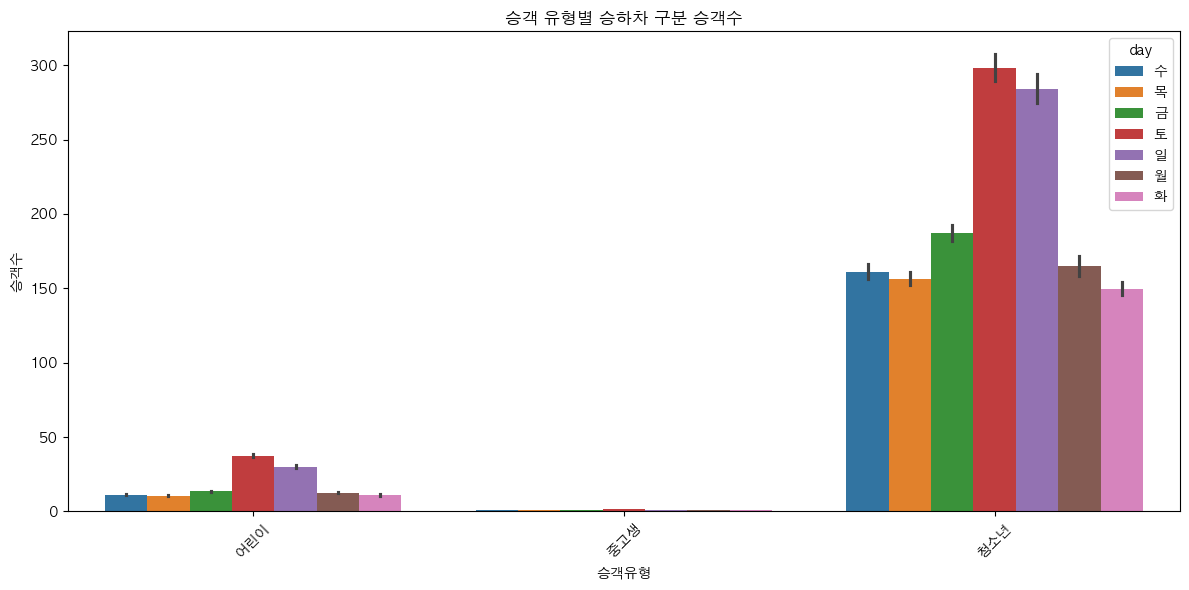

In [19]:
# 그래프 크기 설정
plt.figure(figsize=(12, 6))

# seaborn을 사용한 막대 그래프 생성
sns.barplot(data=hongdae_20time, x='승객유형', y='승객수', hue='day')

# 그래프 제목과 레이블 설정
plt.title('승객 유형별 승하차 구분 승객수')
plt.xlabel('승객유형')
plt.ylabel('승객수')

# x축 레이블 회전
plt.xticks(rotation=45)

# 레이아웃 조정
plt.tight_layout()

plt.show()

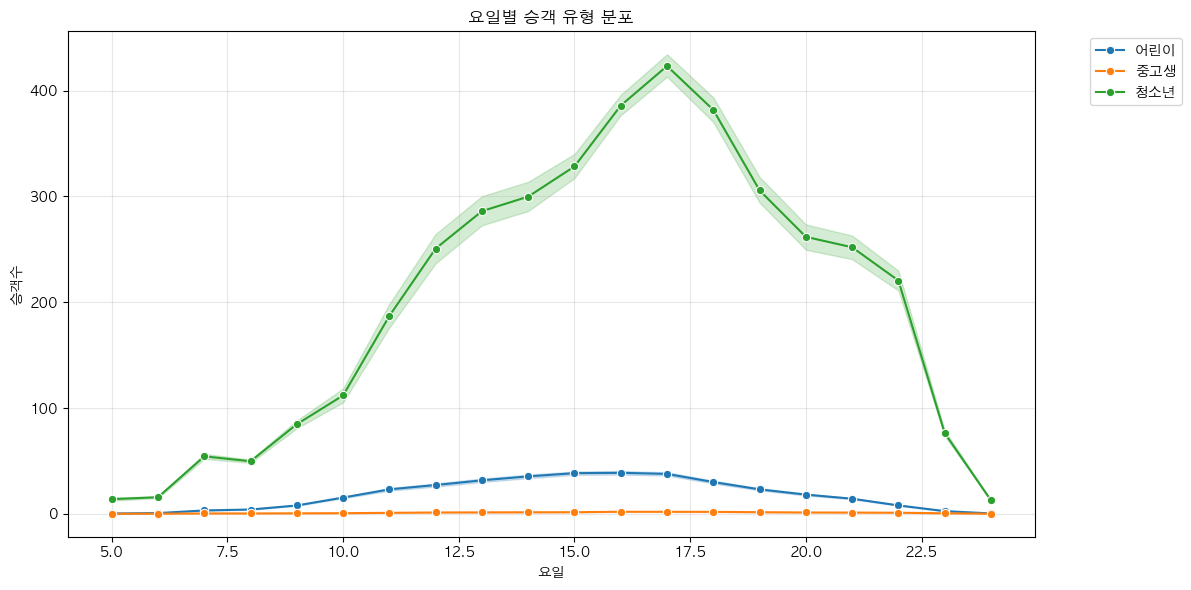

In [27]:
# 그래프 크기 설정
plt.figure(figsize=(12, 6))

# seaborn을 사용한 선 그래프 생성
sns.lineplot(
    data=hongdae_20time,
    x='time',
    y='승객수',
    hue='승객유형',
    marker='o'  # 데이터 포인트를 표시
)

# 그래프 제목과 레이블 설정
plt.title('요일별 승객 유형 분포')
plt.xlabel('요일')
plt.ylabel('승객수')

# 격자 추가
plt.grid(True, alpha=0.3)

# 범례 위치 조정
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# 레이아웃 조정
plt.tight_layout()

plt.show()

<Figure size 1200x600 with 0 Axes>

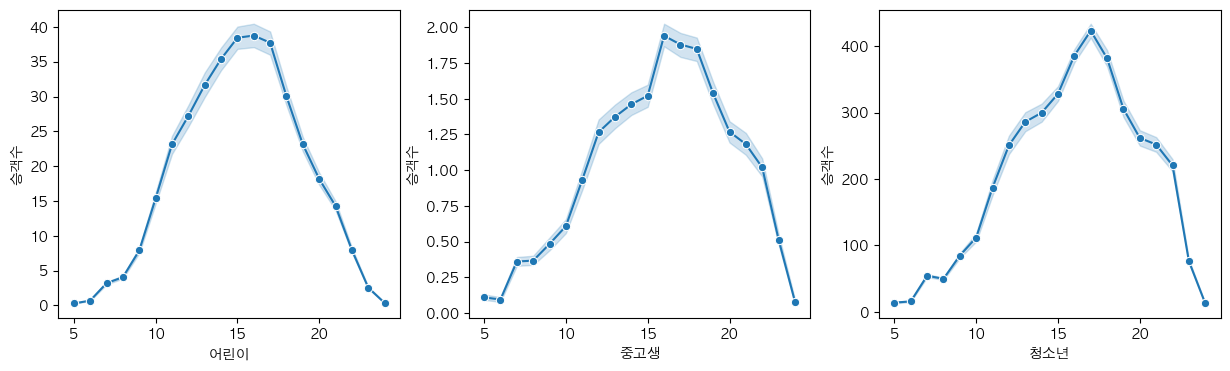

In [33]:
# 그래프 크기 설정
plt.figure(figsize=(12, 6))
fig=plt.figure(figsize=(15,4))
ax1=fig.add_subplot(1,3,1)
ax2=fig.add_subplot(1,3,2)
ax3=fig.add_subplot(1,3,3)

sns.lineplot(
    data=hongdae_20time[hongdae_20time['승객유형']=='어린이'],
    x='time',
    y='승객수',
    marker='o',  # 데이터 포인트를 표시
    ax=ax1,
)
sns.lineplot(
    data=hongdae_20time[hongdae_20time['승객유형']=='중고생'],
    x='time',
    y='승객수',
    marker='o',  # 데이터 포인트를 표시
    ax=ax2
)
sns.lineplot(
    data=hongdae_20time[hongdae_20time['승객유형']=='청소년'],
    x='time',
    y='승객수',
    marker='o',  # 데이터 포인트를 표시
    ax=ax3
)
ax1.set_xlabel('어린이')
ax2.set_xlabel('중고생')
ax3.set_xlabel('청소년')
plt.show()

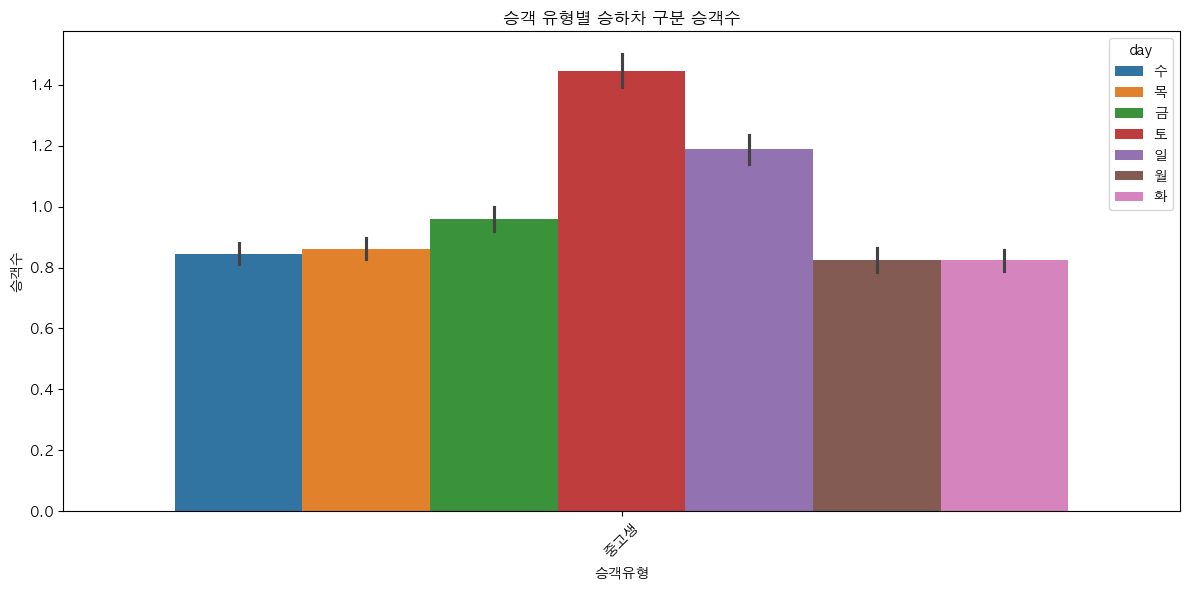

In [18]:
# 그래프 크기 설정
plt.figure(figsize=(12, 6))

# seaborn을 사용한 막대 그래프 생성
sns.barplot(data=hongdae_20time[hongdae_20time['승객유형']=='중고생'], x='승객유형', y='승객수', hue='day')

# 그래프 제목과 레이블 설정
plt.title('승객 유형별 승하차 구분 승객수')
plt.xlabel('승객유형')
plt.ylabel('승객수')

# x축 레이블 회전
plt.xticks(rotation=45)

# 레이아웃 조정
plt.tight_layout()

plt.show()